In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import drive
drive.mount('/content/drive')

%cd /content/drive/MyDrive/Colab Notebooks/Data science/14 Nov River Clustering

df = pd.read_csv('Nov13_cleaned_data.csv')
df

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Colab Notebooks/Data science/14 Nov River Clustering


,Station code,Name of the station,srcYear,srcStateName,MIN_T,MAX_T,MIN_O,MAX_O,MIN_H,MAX_H,...,MAX_C,MIN_B,MAX_B,MIN_N,MAX_N,MIN_F,MAX_F,MIN_CO,MAX_CO,Name of river
0,1262.0,BRAHAMPUTRA AT NIMATIGHAT,2012,ASSAM,17.0,28.0,5.4,7.7,6.7,7.8,...,210.0,0.6,2.5,0.10,2.10,0.0,910.0,300.0,2300.0,BRAHMAPUTRA
1,1526.0,BRAHMPUTRA AT DHENUKHAPAHAR,2012,ASSAM,18.0,27.0,7.9,8.7,6.8,7.7,...,253.0,0.4,3.6,0.10,0.22,0.0,360.0,0.0,2000.0,BRAHMAPUTRA
2,1031.0,BRAHAMPUTRA AT PANDU,2012,ASSAM,20.0,31.0,5.5,8.8,6.6,7.8,...,224.0,0.9,2.1,0.10,0.21,0.0,360.0,700.0,2000.0,BRAHMAPUTRA
3,1299.0,BRAHAMPUTRA AT JOGIJHOGA NEAR BRIDGE,2012,ASSAM,18.0,30.0,5.6,6.9,7.1,8.1,...,234.0,0.8,2.0,0.10,0.30,0.0,0.0,720.0,1500.0,BRAHMAPUTRA
4,2069.0,BRAHMPUTRA NR WATER INTAKE POINT AT KACHARIGHA...,2012,ASSAM,18.0,30.0,6.7,8.2,7.0,8.0,...,205.0,1.3,2.8,0.16,0.46,0.0,360.0,700.0,1400.0,BRAHMAPUTRA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4446,1196.0,"LAKSHMANTIRTHA AT D/S OF HUNSUR TOWN,",2019,KARNATAKA,21.0,28.0,1.5,7.1,6.8,8.3,...,678.0,1.2,5.2,0.30,1.90,260.0,840.0,1700.0,3900.0,LAKSHMANTIRTHA
4447,2772.0,"LAKSHMANTIRTHA AT D/S OF KATTEMALAVADI,",2019,KARNATAKA,21.0,28.0,4.2,6.0,7.6,8.4,...,657.0,3.0,5.4,0.30,2.10,330.0,700.0,2100.0,2800.0,LAKSHMANTIRTHA
4448,3572.0,LAKSHMANTIRTHA AT WATER SUPPLY INTAKE POINT TO...,2019,KARNATAKA,21.0,33.0,5.0,6.8,6.9,8.1,...,616.0,1.5,3.4,0.20,1.50,220.0,630.0,1300.0,2400.0,LAKSHMANTIRTHA
4449,1641.0,SUBARNAREKHA AT RAJGHAT (THENGUDIA),2019,ODISHA,19.0,29.0,6.4,8.4,7.0,8.5,...,539.0,0.4,1.9,0.10,0.50,20.0,1700.0,260.0,3500.0,SUBARNAREKHA


In [ ]:
# dropping columns like name of station
df.drop('Name of the station', axis =1,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4451 entries, 0 to 4450
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Station code   4451 non-null   float64
 1   srcYear        4451 non-null   int64  
 2   srcStateName   4451 non-null   object 
 3   MIN_T          4451 non-null   float64
 4   MAX_T          4451 non-null   float64
 5   MIN_O          4451 non-null   float64
 6   MAX_O          4451 non-null   float64
 7   MIN_H          4451 non-null   float64
 8   MAX_H          4451 non-null   float64
 9   MIN_C          4451 non-null   float64
 10  MAX_C          4451 non-null   float64
 11  MIN_B          4451 non-null   float64
 12  MAX_B          4451 non-null   float64
 13  MIN_N          4451 non-null   float64
 14  MAX_N          4451 non-null   float64
 15  MIN_F          4451 non-null   float64
 16  MAX_F          4451 non-null   float64
 17  MIN_CO         4451 non-null   float64
 18  MAX_CO  

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4451 entries, 0 to 4450
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Station code   4451 non-null   float64
 1   srcYear        4451 non-null   int64  
 2   srcStateName   4451 non-null   object 
 3   MIN_T          4451 non-null   float64
 4   MAX_T          4451 non-null   float64
 5   MIN_O          4451 non-null   float64
 6   MAX_O          4451 non-null   float64
 7   MIN_H          4451 non-null   float64
 8   MAX_H          4451 non-null   float64
 9   MIN_C          4451 non-null   float64
 10  MAX_C          4451 non-null   float64
 11  MIN_B          4451 non-null   float64
 12  MAX_B          4451 non-null   float64
 13  MIN_N          4451 non-null   float64
 14  MAX_N          4451 non-null   float64
 15  MIN_F          4451 non-null   float64
 16  MAX_F          4451 non-null   float64
 17  MIN_CO         4451 non-null   float64
 18  MAX_CO  

In [ ]:
df_allCols = df.iloc[:, [0] +[1] + [2] +list(range(3, 20))]
df_allCols

,Station code,srcYear,srcStateName,MIN_T,MAX_T,MIN_O,MAX_O,MIN_H,MAX_H,MIN_C,MAX_C,MIN_B,MAX_B,MIN_N,MAX_N,MIN_F,MAX_F,MIN_CO,MAX_CO,Name of river
0,1262.0,2012,ASSAM,17.0,28.0,5.4,7.7,6.7,7.8,85.0,210.0,0.6,2.5,0.10,2.10,0.0,910.0,300.0,2300.0,BRAHMAPUTRA
1,1526.0,2012,ASSAM,18.0,27.0,7.9,8.7,6.8,7.7,79.0,253.0,0.4,3.6,0.10,0.22,0.0,360.0,0.0,2000.0,BRAHMAPUTRA
2,1031.0,2012,ASSAM,20.0,31.0,5.5,8.8,6.6,7.8,95.0,224.0,0.9,2.1,0.10,0.21,0.0,360.0,700.0,2000.0,BRAHMAPUTRA
3,1299.0,2012,ASSAM,18.0,30.0,5.6,6.9,7.1,8.1,85.0,234.0,0.8,2.0,0.10,0.30,0.0,0.0,720.0,1500.0,BRAHMAPUTRA
4,2069.0,2012,ASSAM,18.0,30.0,6.7,8.2,7.0,8.0,101.0,205.0,1.3,2.8,0.16,0.46,0.0,360.0,700.0,1400.0,BRAHMAPUTRA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4446,1196.0,2019,KARNATAKA,21.0,28.0,1.5,7.1,6.8,8.3,89.0,678.0,1.2,5.2,0.30,1.90,260.0,840.0,1700.0,3900.0,LAKSHMANTIRTHA
4447,2772.0,2019,KARNATAKA,21.0,28.0,4.2,6.0,7.6,8.4,120.0,657.0,3.0,5.4,0.30,2.10,330.0,700.0,2100.0,2800.0,LAKSHMANTIRTHA
4448,3572.0,2019,KARNATAKA,21.0,33.0,5.0,6.8,6.9,8.1,94.0,616.0,1.5,3.4,0.20,1.50,220.0,630.0,1300.0,2400.0,LAKSHMANTIRTHA
4449,1641.0,2019,ODISHA,19.0,29.0,6.4,8.4,7.0,8.5,142.0,539.0,0.4,1.9,0.10,0.50,20.0,1700.0,260.0,3500.0,SUBARNAREKHA


In [ ]:
df_avg = pd.DataFrame()
df_avg['Average Temperature'] = df_allCols[['MIN_T', 'MAX_T']].mean(axis=1)
df_avg['Average Dissolved Oxygen'] = df_allCols[['MIN_O', 'MAX_O']].mean(axis=1)
df_avg['Average pH'] = df_allCols[['MIN_H', 'MAX_H']].mean(axis=1)
df_avg['Average Conductivity'] = df_allCols[['MIN_C', 'MAX_C']].mean(axis=1)
df_avg['Average BOD'] = df_allCols[['MIN_B', 'MAX_B']].mean(axis=1)
df_avg['Average Ni-trate/trite'] = df_allCols[['MIN_N', 'MAX_N']].mean(axis=1)
df_avg['Average Feacal Coliform'] = df_allCols[['MIN_F', 'MAX_F']].mean(axis=1)
df_avg['Average Coliform'] = df_allCols[['MIN_CO', 'MAX_CO']].mean(axis=1)
df_avg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4451 entries, 0 to 4450
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Average Temperature       4451 non-null   float64
 1   Average Dissolved Oxygen  4451 non-null   float64
 2   Average pH                4451 non-null   float64
 3   Average Conductivity      4451 non-null   float64
 4   Average BOD               4451 non-null   float64
 5   Average Ni-trate/trite    4451 non-null   float64
 6   Average Feacal Coliform   4451 non-null   float64
 7   Average Coliform          4451 non-null   float64
dtypes: float64(8)
memory usage: 278.3 KB


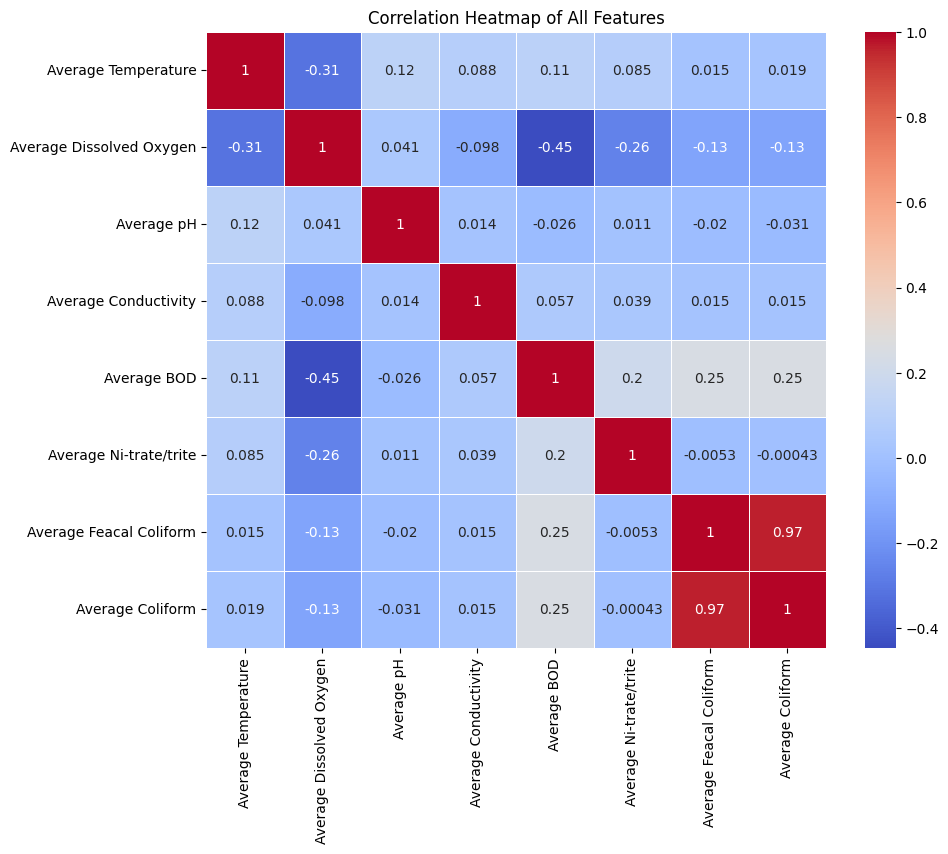

In [ ]:
# Calculate the correlation matrix
correlation_matrix = df_avg.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap of All Features')
plt.show()

In [ ]:
df_allCols.reset_index(drop=True, inplace=True)

In [ ]:
rivername_column = df_allCols.iloc[:, 19]
station_column = df_allCols.iloc[:, 0]
year_column = df_allCols.iloc[:,1]
state_column = df_allCols.iloc[:,2]


df_avg = pd.concat([df_avg,rivername_column,station_column, year_column,state_column], axis=1)

In [ ]:
df_avg

,Average Temperature,Average Dissolved Oxygen,Average pH,Average Conductivity,Average BOD,Average Ni-trate/trite,Average Feacal Coliform,Average Coliform,Name of river,Station code,srcYear,srcStateName
0,22.5,6.55,7.25,147.5,1.55,1.100,455.0,1300.0,BRAHMAPUTRA,1262.0,2012,ASSAM
1,22.5,8.30,7.25,166.0,2.00,0.160,180.0,1000.0,BRAHMAPUTRA,1526.0,2012,ASSAM
2,25.5,7.15,7.20,159.5,1.50,0.155,180.0,1350.0,BRAHMAPUTRA,1031.0,2012,ASSAM
3,24.0,6.25,7.60,159.5,1.40,0.200,0.0,1110.0,BRAHMAPUTRA,1299.0,2012,ASSAM
4,24.0,7.45,7.50,153.0,2.05,0.310,180.0,1050.0,BRAHMAPUTRA,2069.0,2012,ASSAM
...,...,...,...,...,...,...,...,...,...,...,...,...
4446,24.5,4.30,7.55,383.5,3.20,1.100,550.0,2800.0,LAKSHMANTIRTHA,1196.0,2019,KARNATAKA
4447,24.5,5.10,8.00,388.5,4.20,1.200,515.0,2450.0,LAKSHMANTIRTHA,2772.0,2019,KARNATAKA
4448,27.0,5.90,7.50,355.0,2.45,0.850,425.0,1850.0,LAKSHMANTIRTHA,3572.0,2019,KARNATAKA
4449,24.0,7.40,7.75,340.5,1.15,0.300,860.0,1880.0,SUBARNAREKHA,1641.0,2019,ODISHA


In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
# Perform PCA
pca = PCA()
scaler = StandardScaler()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

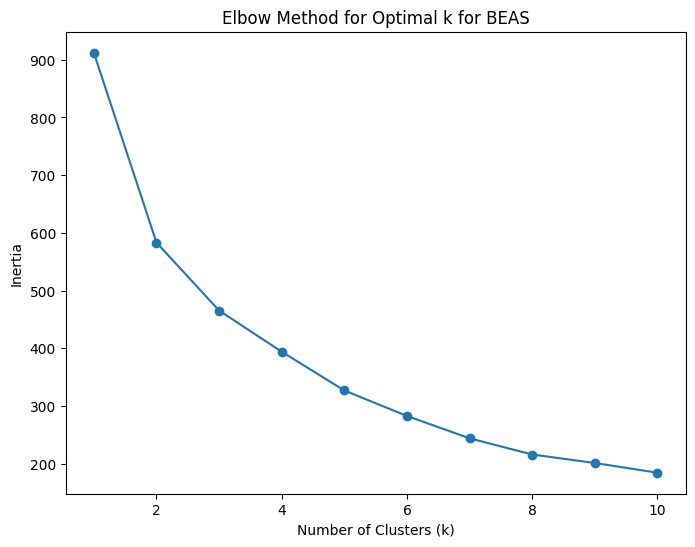

In [ ]:
river_list = ['BEAS'] ## change river_list to add other rivers like 'BRAHMAPUTRA', 'GANGA' etc to get plots for other rivers

for river in river_list:

  df_river = df_avg[df_avg['Name of river'] == river]

  df_river.reset_index(drop=True, inplace=True)

  float_values = df_river.iloc[:,[0]+[1]+[2]+[3]+[5]+[6]]

  scaled_float_values = scaler.fit_transform(float_values)

  # Perform PCA
  principal_components = pca.fit_transform(scaled_float_values)

  # Create a DataFrame with the principal components
  principal_df = pd.DataFrame(data=principal_components, columns=[f'PC{i}' for i in range(1, len(float_values.columns)+1)])

  # Concatenate the strings column with the PCA results
  final_df = pd.concat([df_river.iloc[:,[8]],df_river.iloc[:,[10]],df_river.iloc[:,[9]], principal_df], axis=1)

  inertia = []
  for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_float_values)
    inertia.append(kmeans.inertia_)

  # Plot the elbow curve
  plt.figure(figsize=(8, 6))
  plt.plot(range(1, 11), inertia, marker='o')
  plt.title('Elbow Method for Optimal k for ' + str(river))
  plt.xlabel('Number of Clusters (k)')
  plt.ylabel('Inertia')
  plt.show()

In [ ]:
# Assuming you want to perform 3 clusters, you can change n_clusters as needed
n_clusters = 3
# Initialize the KMeans model

kmeans = KMeans(n_clusters=n_clusters, random_state=0)

# Fit the model to the standardized float values
kmeans.fit(scaled_float_values)

# Get the cluster assignments for each observation
cluster_assignments = kmeans.labels_
cluster_centers = kmeans.cluster_centers_

# Add the cluster assignments to the DataFrame
df_river['Cluster'] = cluster_assignments

df_river.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152 entries, 0 to 151
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Average Temperature       152 non-null    float64
 1   Average Dissolved Oxygen  152 non-null    float64
 2   Average pH                152 non-null    float64
 3   Average Conductivity      152 non-null    float64
 4   Average BOD               152 non-null    float64
 5   Average Ni-trate/trite    152 non-null    float64
 6   Average Feacal Coliform   152 non-null    float64
 7   Average Coliform          152 non-null    float64
 8   Name of river             152 non-null    object 
 9   Station code              152 non-null    float64
 10  srcYear                   152 non-null    int64  
 11  srcStateName              152 non-null    object 
 12  Cluster                   152 non-null    int32  
dtypes: float64(9), int32(1), int64(1), object(2)
memory usage: 15.0+ 

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-111-f23d0825812d>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_river['Cluster'] = cluster_assignments


In [ ]:
final_df = pd.concat([df_river.iloc[:,[12]], final_df], axis=1)
final_df

,Cluster,Name of river,srcYear,Station code,PC1,PC2,PC3,PC4,PC5,PC6
0,0,BEAS,2012,1001.0,-1.710291,-0.791797,-0.255737,0.626091,1.045847,-0.116783
1,0,BEAS,2012,1002.0,-1.279644,-1.084357,-0.117251,0.609606,0.313316,-0.359092
2,0,BEAS,2012,1003.0,-1.296532,-1.267699,-0.482013,0.364962,0.082299,-0.336693
3,0,BEAS,2012,1004.0,-1.718899,-0.235241,0.066577,0.266709,0.249008,0.064574
4,0,BEAS,2012,1005.0,-1.961294,-0.195432,0.429800,0.343833,-0.634099,0.449666
...,...,...,...,...,...,...,...,...,...,...
147,1,BEAS,2019,4164.0,1.099559,0.361855,0.623758,-0.593229,-0.200292,-0.796020
148,1,BEAS,2019,1011.0,0.676407,0.575327,1.430949,-0.512412,-0.198409,-0.508176
149,1,BEAS,2019,1012.0,0.600493,0.768394,0.707679,-0.414377,0.183595,0.043447
150,0,BEAS,2019,1696.0,0.179625,0.635917,0.417705,-0.646904,-0.232234,-0.283337


<ipython-input-113-e9d6b64f0dbe>:12: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  scatter = plt.scatter(pc1, pc2, c=clusters, cmap=plt.cm.get_cmap('Spectral', 10), alpha=0.5)


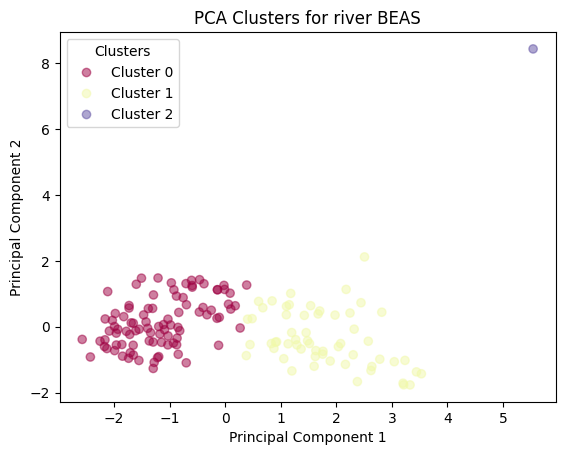

In [ ]:
pc1 = final_df['PC1']
pc2 = final_df['PC2']

import matplotlib.pyplot as plt

clusters = final_df['Cluster']

# Define a color map for the clusters (adjust colors as needed)
colors = ['blue', 'green', 'red', 'purple', 'brown','yellow']  # Add more colors if you have more clusters

# Plot the clusters
scatter = plt.scatter(pc1, pc2, c=clusters, cmap=plt.cm.get_cmap('Spectral', 10), alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Clusters for river ' + str(river))

# Add a legend for the clusters
legend_labels = [f'Cluster {i}' for i in range(len(colors))]
plt.legend(handles=scatter.legend_elements()[0], title='Clusters', labels=legend_labels)

plt.show()

<ipython-input-114-b9a48392d0f3>:12: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  scatter = plt.scatter(pc1, pc2, c=clusters, cmap=plt.cm.get_cmap('Spectral', 10), alpha=0.5)


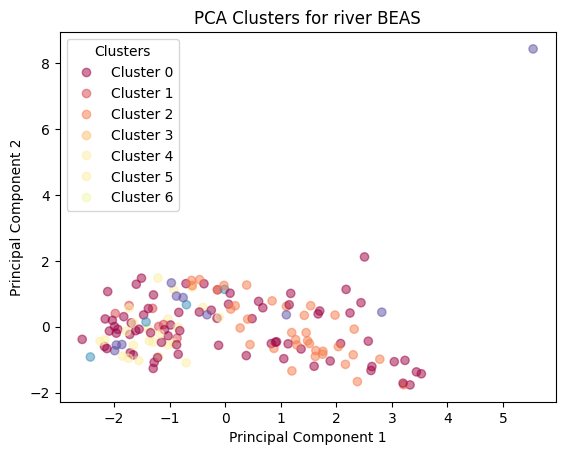

In [ ]:
pc1 = final_df['PC1']
pc2 = final_df['PC2']

import matplotlib.pyplot as plt

clusters = final_df['Station code']

# Define a color map for the clusters (adjust colors as needed)
colors = ['Blues', 'Greens', 'Reds', 'Purples', 'Oranges', 'YlOrBr', 'YlGnBu']  # Add more colors if you have more clusters

# Plot the clusters
scatter = plt.scatter(pc1, pc2, c=clusters, cmap=plt.cm.get_cmap('Spectral', 10), alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Clusters for river ' + str(river))

# Add a legend for the clusters
legend_labels = [f'Cluster {i}' for i in range(len(colors))]
plt.legend(handles=scatter.legend_elements()[0], title='Clusters', labels=legend_labels)

plt.show()


In [ ]:
Cluster0_table = df_river[df_river['Cluster']==0]
Cluster0_table

,Average Temperature,Average Dissolved Oxygen,Average pH,Average Conductivity,Average BOD,Average Ni-trate/trite,Average Feacal Coliform,Average Coliform,Name of river,Station code,srcYear,srcStateName,Cluster
0,7.0,8.40,7.80,83.0,0.45,0.710,41.5,157.0,BEAS,1001.0,2012,HIMACHAL PRADESH,0
1,8.5,8.90,7.65,110.0,4.40,0.920,103.0,570.0,BEAS,1002.0,2012,HIMACHAL PRADESH,0
2,9.0,9.00,7.55,97.5,0.25,0.905,50.5,240.0,BEAS,1003.0,2012,HIMACHAL PRADESH,0
3,11.0,9.05,7.85,117.5,0.20,0.535,37.5,195.0,BEAS,1004.0,2012,HIMACHAL PRADESH,0
4,13.0,10.05,7.90,110.5,0.15,0.750,35.5,145.0,BEAS,1005.0,2012,HIMACHAL PRADESH,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
142,20.0,7.75,7.60,209.0,1.05,0.250,38.5,82.0,BEAS,1693.0,2019,PUNJAB,0
143,21.5,8.15,7.85,252.0,1.20,0.350,86.5,179.5,BEAS,1694.0,2019,PUNJAB,0
144,21.5,8.20,7.70,260.0,1.20,0.250,68.0,120.0,BEAS,1010.0,2019,PUNJAB,0
145,21.0,7.95,8.00,255.0,1.35,0.550,292.0,480.0,BEAS,1695.0,2019,PUNJAB,0


In [ ]:
average_vals_0 = Cluster0_table.iloc[:,0:8]
print(average_vals_0.mean())

Average Temperature          13.610215
Average Dissolved Oxygen      8.861828
Average pH                    7.800484
Average Conductivity        178.568817
Average BOD                   0.391935
Average Ni-trate/trite        0.546349
Average Feacal Coliform      44.409140
Average Coliform            258.655914
dtype: float64


In [ ]:
Cluster1_table = df_river[df_river['Cluster']==1]
average_vals_1 = Cluster1_table.iloc[:,0:8]
print(average_vals_1.mean())
Cluster1_table

Average Temperature          19.525862
Average Dissolved Oxygen      7.388966
Average pH                    7.462931
Average Conductivity        249.405172
Average BOD                   1.114655
Average Ni-trate/trite        1.793121
Average Feacal Coliform     250.629310
Average Coliform            583.879310
dtype: float64


,Average Temperature,Average Dissolved Oxygen,Average pH,Average Conductivity,Average BOD,Average Ni-trate/trite,Average Feacal Coliform,Average Coliform,Name of river,Station code,srcYear,srcStateName,Cluster
6,15.5,8.75,7.50,191.5,0.45,1.825,143.0,910.0,BEAS,1006.0,2012,HIMACHAL PRADESH,1
10,18.5,7.60,7.25,279.5,0.45,1.350,50.5,275.0,BEAS,1693.0,2012,PUNJAB,1
11,19.0,7.30,7.35,280.0,0.75,1.350,115.0,500.0,BEAS,1694.0,2012,PUNJAB,1
12,18.0,7.00,7.25,410.5,1.20,1.950,145.0,600.0,BEAS,1695.0,2012,PUNJAB,1
13,19.0,7.05,7.30,289.0,0.80,2.150,120.0,600.0,BEAS,1010.0,2012,PUNJAB,1
14,19.0,7.00,7.30,306.5,1.15,2.400,550.0,1100.0,BEAS,1294.0,2012,PUNJAB,1
15,17.0,7.35,7.20,305.0,0.80,2.250,410.0,850.0,BEAS,1011.0,2012,PUNJAB,1
16,17.5,7.00,7.30,305.5,0.75,2.600,365.0,850.0,BEAS,1696.0,2012,PUNJAB,1
17,17.0,7.10,7.35,314.0,1.00,3.500,555.0,1100.0,BEAS,1012.0,2012,PUNJAB,1
18,19.0,7.40,7.25,302.5,0.65,2.200,115.0,650.0,BEAS,1697.0,2012,PUNJAB,1


In [ ]:
Cluster2_table = df_river[df_river['Cluster']==2]
average_vals_2 = Cluster2_table.iloc[:,0:8]
print(average_vals_2.mean())
Cluster2_table

Average Temperature           26.50
Average Dissolved Oxygen       5.45
Average pH                     8.20
Average Conductivity        1645.00
Average BOD                    1.55
Average Ni-trate/trite         2.80
Average Feacal Coliform        3.50
Average Coliform               7.50
dtype: float64


,Average Temperature,Average Dissolved Oxygen,Average pH,Average Conductivity,Average BOD,Average Ni-trate/trite,Average Feacal Coliform,Average Coliform,Name of river,Station code,srcYear,srcStateName,Cluster
119,26.5,5.45,8.2,1645.0,1.55,2.8,3.5,7.5,BEAS,4165.0,2018,PUNJAB,2


In [ ]:
Cluster3_table = df_river[df_river['Cluster']==3]
average_vals_3 = Cluster3_table.iloc[:,0:8]
print(average_vals_3.mean())
Cluster3_table

Average Temperature        NaN
Average Dissolved Oxygen   NaN
Average pH                 NaN
Average Conductivity       NaN
Average BOD                NaN
Average Ni-trate/trite     NaN
Average Feacal Coliform    NaN
Average Coliform           NaN
dtype: float64


,Average Temperature,Average Dissolved Oxygen,Average pH,Average Conductivity,Average BOD,Average Ni-trate/trite,Average Feacal Coliform,Average Coliform,Name of river,Station code,srcYear,srcStateName,Cluster


In [ ]:
Cluster4_table = df_river[df_river['Cluster']==4]
average_vals_4 = Cluster4_table.iloc[:,0:8]
print(average_vals_4.mean())
Cluster4_table

Average Temperature        NaN
Average Dissolved Oxygen   NaN
Average pH                 NaN
Average Conductivity       NaN
Average BOD                NaN
Average Ni-trate/trite     NaN
Average Feacal Coliform    NaN
Average Coliform           NaN
dtype: float64


,Average Temperature,Average Dissolved Oxygen,Average pH,Average Conductivity,Average BOD,Average Ni-trate/trite,Average Feacal Coliform,Average Coliform,Name of river,Station code,srcYear,srcStateName,Cluster


In [ ]:
Cluster5_table = df_river[df_river['Cluster']==5]
average_vals_5 = Cluster5_table.iloc[:,0:8]
print(average_vals_5.mean())
Cluster5_table

Average Temperature        NaN
Average Dissolved Oxygen   NaN
Average pH                 NaN
Average Conductivity       NaN
Average BOD                NaN
Average Ni-trate/trite     NaN
Average Feacal Coliform    NaN
Average Coliform           NaN
dtype: float64


,Average Temperature,Average Dissolved Oxygen,Average pH,Average Conductivity,Average BOD,Average Ni-trate/trite,Average Feacal Coliform,Average Coliform,Name of river,Station code,srcYear,srcStateName,Cluster


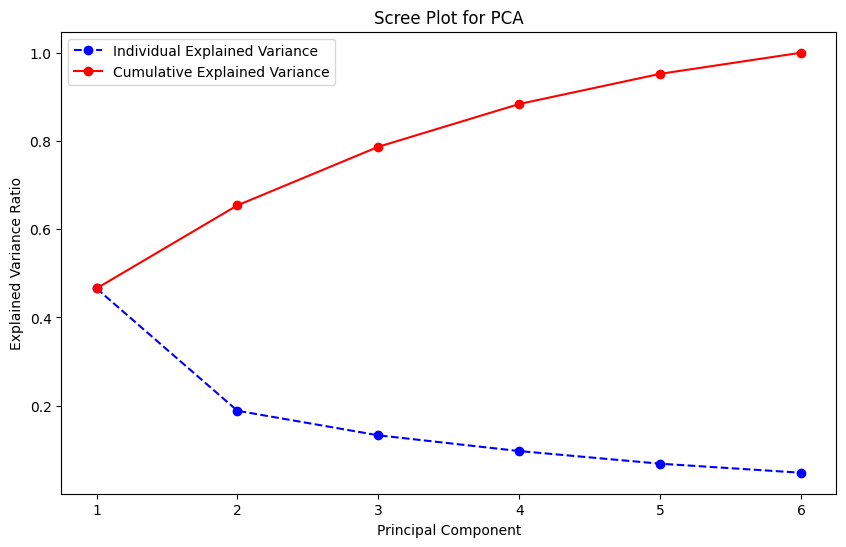

In [ ]:
explained_variance_ratio = pca.explained_variance_ratio_

# Calculate the cumulative explained variance
cumulative_variance = np.cumsum(explained_variance_ratio)

# Plot the scree plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o', linestyle='--', color='b', label='Individual Explained Variance')
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='-', color='r', label='Cumulative Explained Variance')
plt.title('Scree Plot for PCA')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.legend()
plt.show()